In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/rainfall in india 1901-2015 (2) (1).csv")
print(data)
y = data['ANNUAL'].fillna(0)
#print(y)
x = data.drop(['ANNUAL', 'SUBDIVISION'], axis=1).fillna(0)
#print(x)

                    SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1     ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2     ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3     ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4     ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
...                         ...   ...   ...    ...   ...    ...    ...    ...   
4111                LAKSHADWEEP  2011   5.1    2.8   3.1   85.9  107.2  153.6   
4112                LAKSHADWEEP  2012  19.2    0.1   1.6   76.8   21.2  327.0   
4113                LAKSHADWEEP  2013  26.2   34.4  37.5    5.3   88.3  426.2   
4114                LAKSHADWEEP  2014  53.2   16.1   4.4   14.9   57.4  244.1   
4115                LAKSHADWEEP  2015   2.2    0.5   3.7   87.1  133.1  296.6   

        JUL    AUG    SEP  

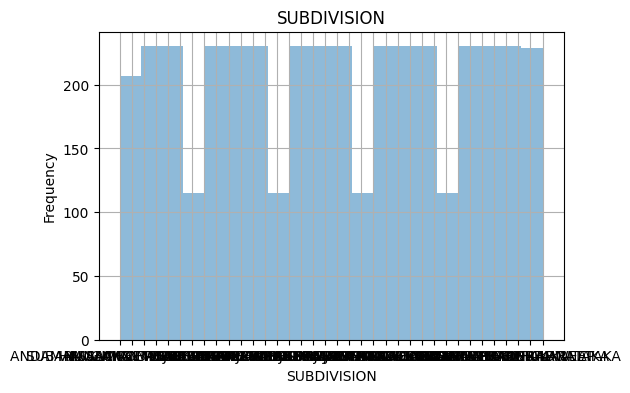

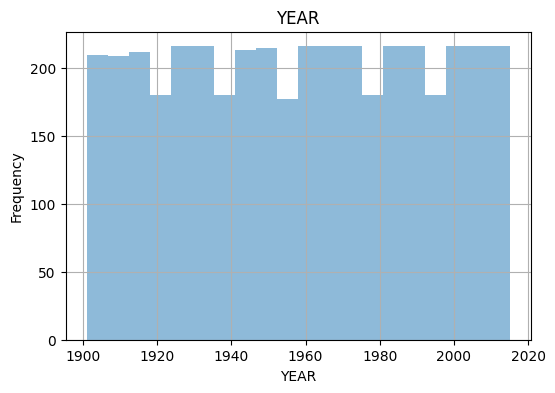

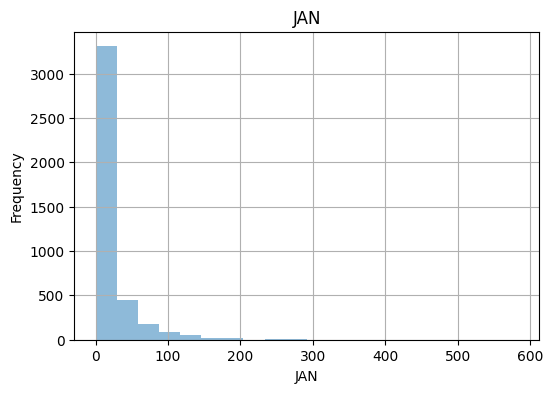

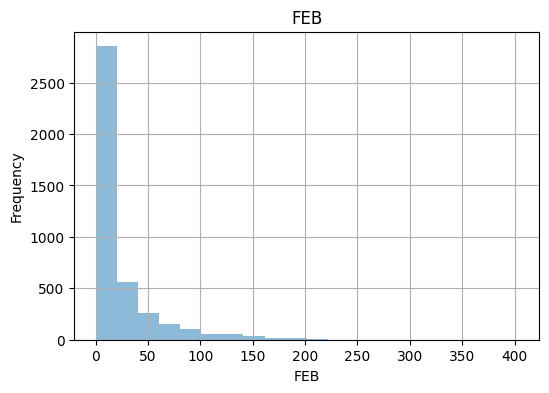

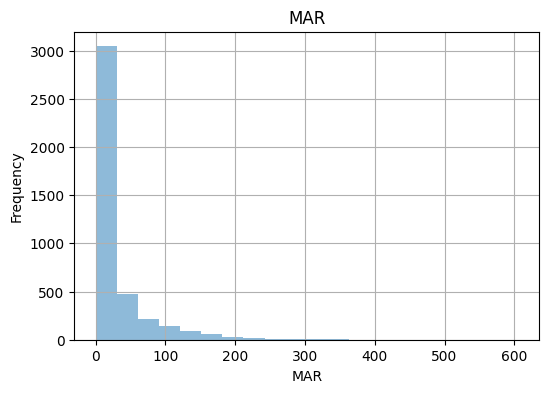

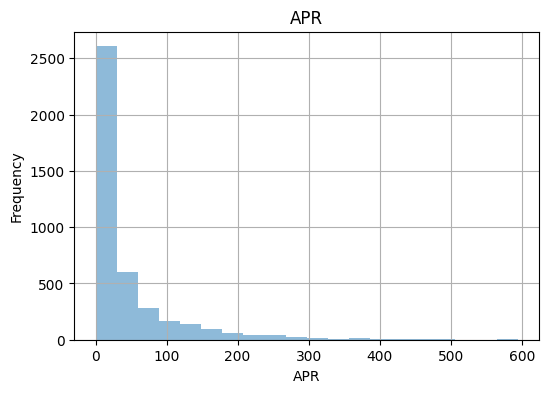

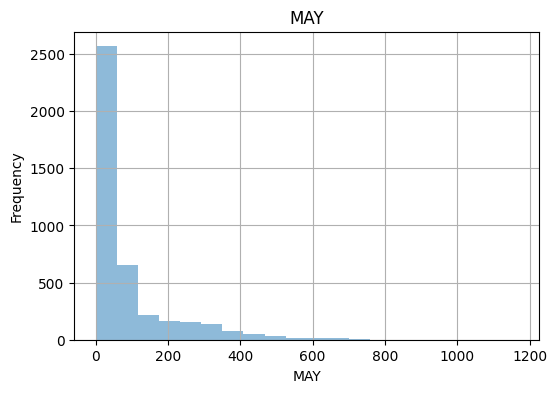

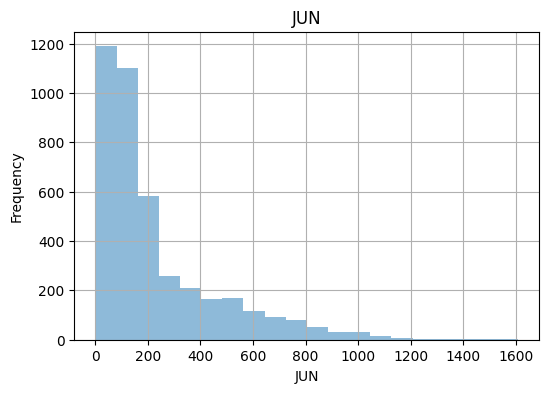

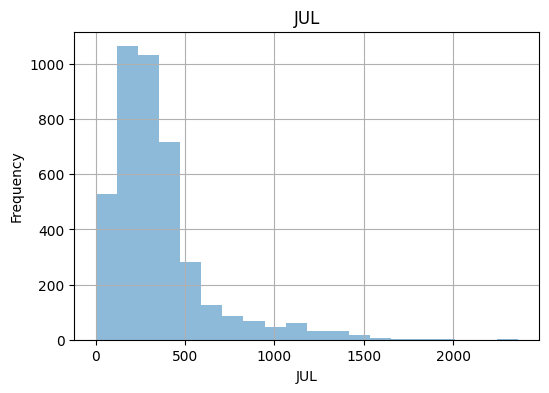

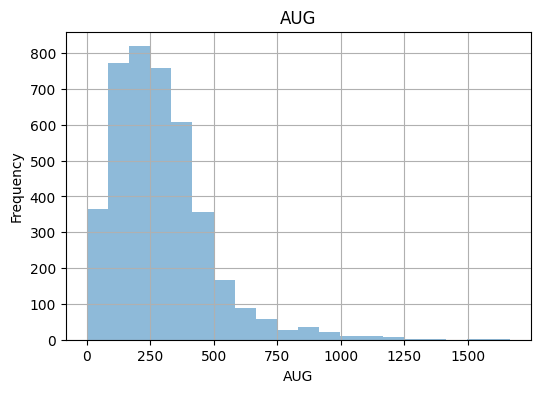

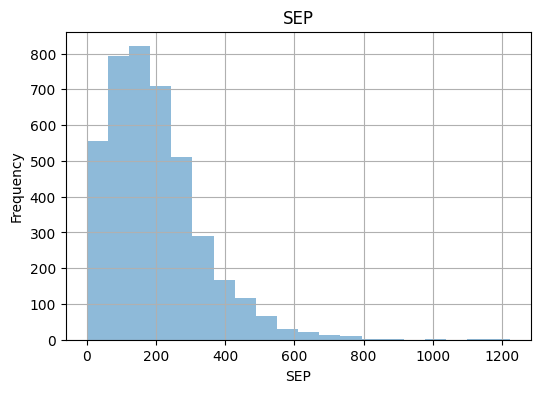

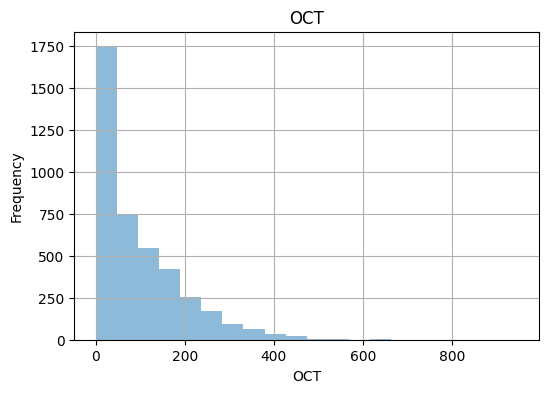

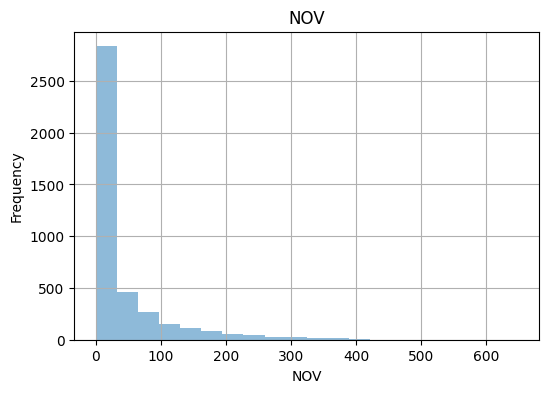

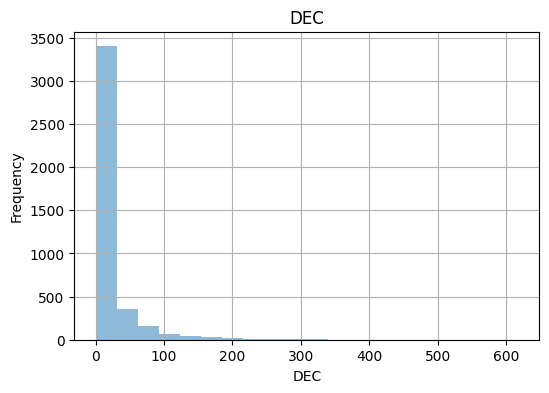

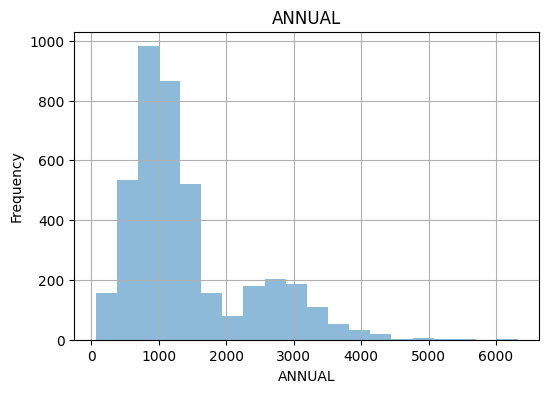

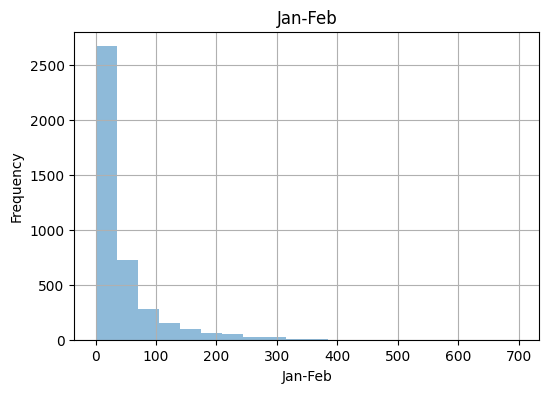

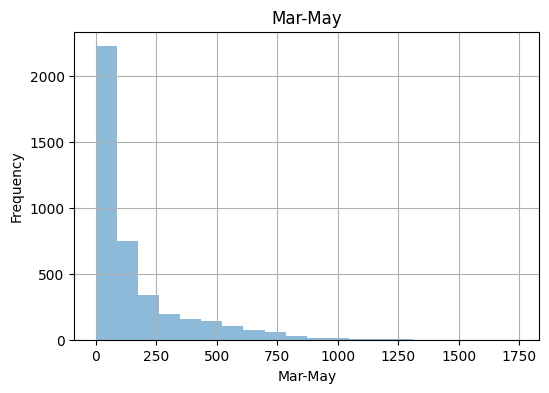

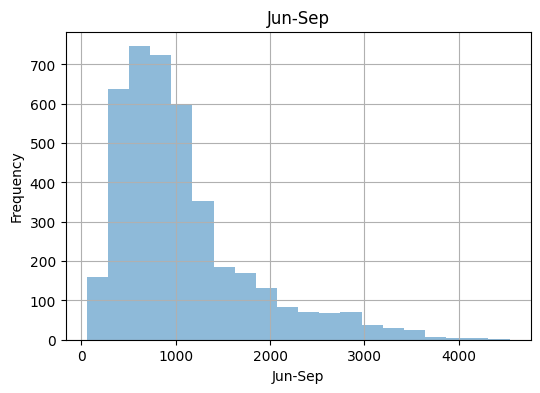

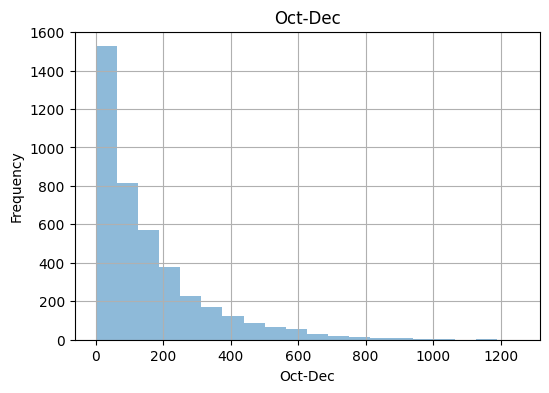

In [ ]:
import matplotlib.pyplot as plt

# Loop through columns and plot histograms
for column in data.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[column], bins=20, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"{column}")
    plt.grid(True)  # Add grids
    plt.show()

#To add a grid to the final empty figure
#plt.figure(figsize=(6, 4))
#plt.grid(True)
#plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Perform linear regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=102)

# Create and fit a Ridge regression model with regularization parameter alpha
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
# Make predictions
y_pred = ridge.predict(x_test)

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)



Mean Squared Error: 13983.121505596422


Mean Squared Error (MSE) - Avg: 14660.343455510947 Std: 4770.300156034329
Mean Absolute Error (MAE) - Avg: 17.387224415303038 Std: 5.841849441480758
Root Mean Squared Error (RMSE) - Avg: 119.88408478200687 Std: 16.974971914307613


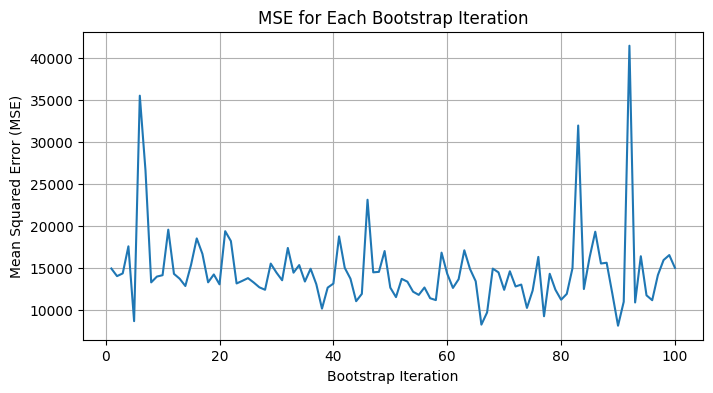

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=102)

# Initialize the Linear Regression model
model = LinearRegression()

n_bootstrap_iterations = 100

mse_values = []
mae_values = []
rmse_values = []

# Perform bootstrapping
for _ in range(n_bootstrap_iterations):
    # Resample the training data with replacement
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train.iloc[indices]  # Use iloc to select data by indices
    y_bootstrap = y_train.iloc[indices]

    # Fit the model to the bootstrapped data
    model.fit(x_bootstrap, y_bootstrap)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate performance metrics for this iteration
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append the metrics to the respective lists
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Calculate and print the average and standard deviation of the metrics
avg_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
avg_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
avg_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)

print("Mean Squared Error (MSE) - Avg:", avg_mse, "Std:", std_mse)
print("Mean Absolute Error (MAE) - Avg:", avg_mae, "Std:", std_mae)
print("Root Mean Squared Error (RMSE) - Avg:", avg_rmse, "Std:", std_rmse)

# Create a plot of MSE values
c = range(1, n_bootstrap_iterations + 1)  # Adjusted for 1-based indexing
plt.figure(figsize=(8, 4))
plt.plot(c, mse_values)
plt.xlabel("Bootstrap Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Bootstrap Iteration")
plt.grid(True)
plt.show()



In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

svm_classifier = SVR( C=2)
svm_classifier.fit(x_train, y_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=102)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Mean Absolute Error (MAE): 679.5770978251148
Mean Squared Error (MSE): 941366.0700246845
Root Mean Squared Error (RMSE): 970.2402125374338


In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
svm_classifier = SVR(C=2)
# Scale your data using Min-Max scaling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
# Split the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=102)
# Create empty lists to store the performance metrics for each iteration
mae_values = []
mse_values = []
rmse_values = []
r2_values = []
n_bootstrap_iterations = 100



In [ ]:
for _ in range(n_bootstrap_iterations):
    # Generate random indices for resampling
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    # Ensure the indices do not exceed the length of the arrays
    indices = indices % len(x_train)
    x_bootstrap = x_train[indices]
    y_bootstrap = y_train.iloc[indices]  # Using .iloc to access a Pandas Series
    # Fit the SVR model to the bootstrapped data
    svm_classifier.fit(x_bootstrap, y_bootstrap)
    # Make predictions on the test set
    y_pred = svm_classifier.predict(x_test)
    # Calculate performance metrics for this iteration
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Append the metrics to the respective lists
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(r2)


In [ ]:
# Calculate and print the average and standard deviation of the metrics
avg_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
avg_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
avg_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)
avg_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)
print("Mean Absolute Error (MAE) - Avg:", avg_mae, "Std:", std_mae)
print("Mean Squared Error (MSE) - Avg:", avg_mse, "Std:", std_mse)
print("Root Mean Squared Error (RMSE) - Avg:", avg_rmse, "Std:", std_rmse)
print("R-squared (R2) - Avg:", avg_r2, "Std:", std_r2)

Mean Absolute Error (MAE) - Avg: 396.19337732766394 Std: 5.485294987634676
Mean Squared Error (MSE) - Avg: 437002.1735628565 Std: 12928.94990654706
Root Mean Squared Error (RMSE) - Avg: 660.9888440453982 Std: 9.793957850880757
R-squared (R2) - Avg: 0.5036586692110175 Std: 0.01468453154363233


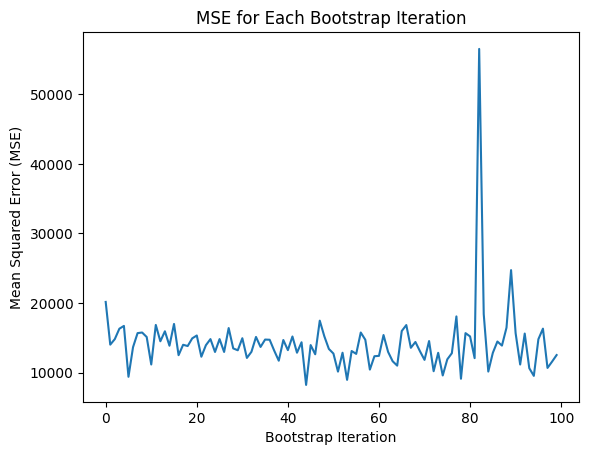

In [ ]:
c = range(0, 100)
plt.xlabel("Bootstrap Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Bootstrap Iteration")
mse_values = mse_values[:len(c)]  # Truncate mse_values to match the length of c
plt.plot(c, mse_values)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = ridge.coef_
print("Coefficients:", coefficients)

Mean Squared Error: 19001.8279095188
Coefficients: [  14.10915611  137.75887059   48.02514175  124.22069582 -103.95373875
  -68.22329507  465.65606427  996.91888224  526.89751601  512.82249524
 -213.76960364 -208.18970731 -166.84003292  423.11922176 1821.70910307
 2811.3652714  1568.10011091]


Average Mean Squared Error (MSE): 14208.89668825348
Average Coefficients: [ -0.04404646 -36.4938345  -36.53335273  -8.15936669  -8.23122832
  -8.24190821  -0.57540463  -0.56244089  -0.6280021   -0.54901151
  -7.42809947  -7.38068449  -7.42790579  37.499584     9.21015868
   1.57589592   8.41768489]


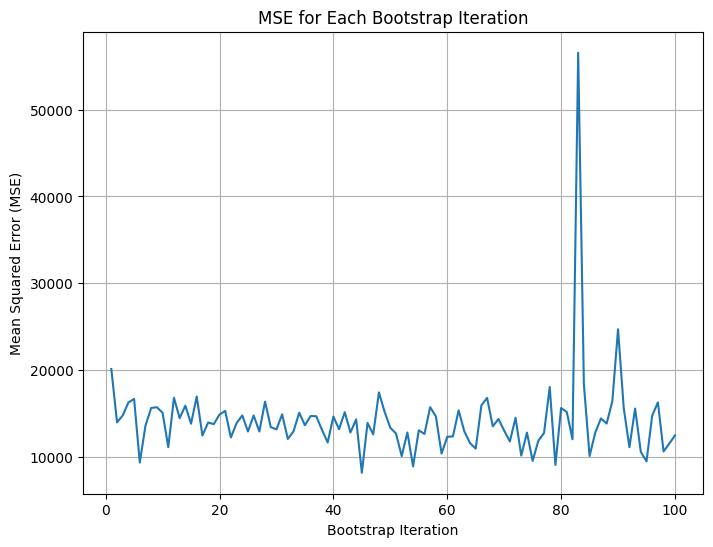

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
# Assuming you have x_train and x_test DataFrames with valid column names
# Make sure x_train and x_test have the same columns
# You should replace 'x_train' and 'x_test' with your actual DataFrames
# Create an instance of the Ridge model
ridge = Ridge(alpha=1.0)
# Create empty lists to store the performance metrics for each iteration
mse_values = []
coefficients = []
# Define the number of bootstrap iterations
n_bootstrap_iterations = 100  # You can adjust this as needed
# Perform bootstrapping
for _ in range(n_bootstrap_iterations):
    # Generate random indices for resampling
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    # Ensure the indices do not exceed the length of the arrays
    indices = indices % len(x_train)
    x_bootstrap = x_train.iloc[indices]  # Use .iloc to access the DataFrame by indices
    y_bootstrap = y_train.iloc[indices]
    # Fit the Ridge model to the bootstrapped data
    ridge.fit(x_bootstrap, y_bootstrap)
    # Make predictions on the test set
    y_pred = ridge.predict(x_test)
    # Calculate mean squared error for this iteration
    mse = mean_squared_error(y_test, y_pred)
    # Append the MSE and coefficients to the respective lists
    mse_values.append(mse)
    coefficients.append(ridge.coef_)
# Calculate and print the average MSE
avg_mse = np.mean(mse_values)
print("Average Mean Squared Error (MSE):", avg_mse)
# Calculate and print the average coefficients
avg_coefficients = np.mean(coefficients, axis=0)
print("Average Coefficients:", avg_coefficients)
# Create a plot of MSE values
c = range(1, n_bootstrap_iterations + 1)  # Adjusted for 1-based indexing
plt.figure(figsize=(8, 6))
plt.plot(c, mse_values)
plt.xlabel("Bootstrap Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Bootstrap Iteration")
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 18803.974950241125


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
# Create an instance of the Lasso model
lasso = Lasso(alpha=1.0)
# Create empty lists to store the performance metrics for each iteration
mse_values = []
# Define the number of bootstrap iterations
n_bootstrap_iterations = 100  # You can adjust this as needed
# Perform bootstrapping
for _ in range(n_bootstrap_iterations):
    # Generate random indices for resampling
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    # Ensure the indices do not exceed the length of the arrays
    indices = indices % len(x_train)

    x_bootstrap = x_train[indices]
    y_bootstrap = y_train.iloc[indices]  # Using .iloc to access a Pandas Series

    # Fit the Lasso model to the bootstrapped data
    lasso.fit(x_bootstrap, y_bootstrap)

    # Make predictions on the test set
    y_pred = lasso.predict(x_test)

    # Calculate mean squared error for this iteration
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE to the mse_values list
    mse_values.append(mse)

# Calculate and print the average MSE
avg_mse = np.mean(mse_values)
print("Average Mean Squared Error (MSE):", avg_mse)


Average Mean Squared Error (MSE): 19124.935359711497


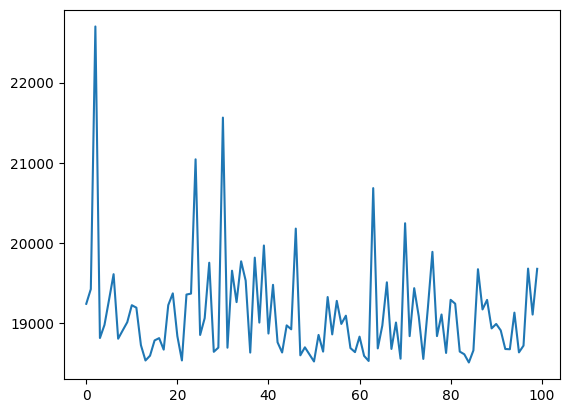

In [ ]:
c=range(0,100)
plt.plot(c,mse_values)

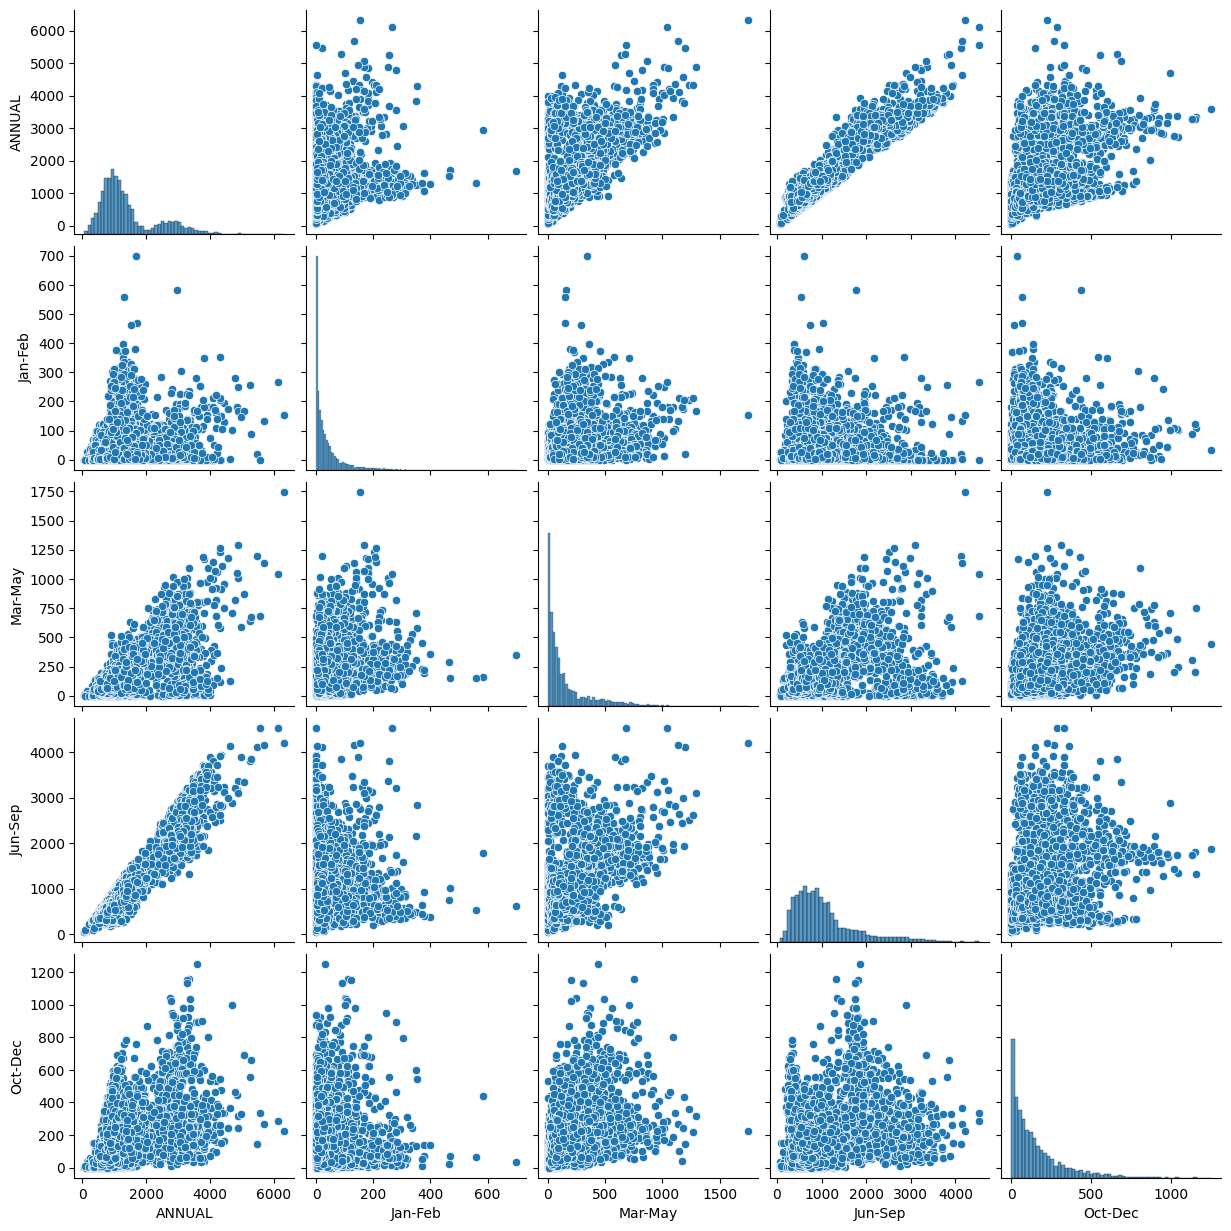

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns you want to include in the pair plot (features and the target)
columns_to_plot = ['ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']  # Replace with actual feature names

# Create a DataFrame with the selected columns
data_to_plot = data[columns_to_plot]

# Create pair plots without KDE on the diagonal
sns.pairplot(data_to_plot)
plt.show()
